In [50]:
import re
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib notebook

<IPython.core.display.Javascript object>


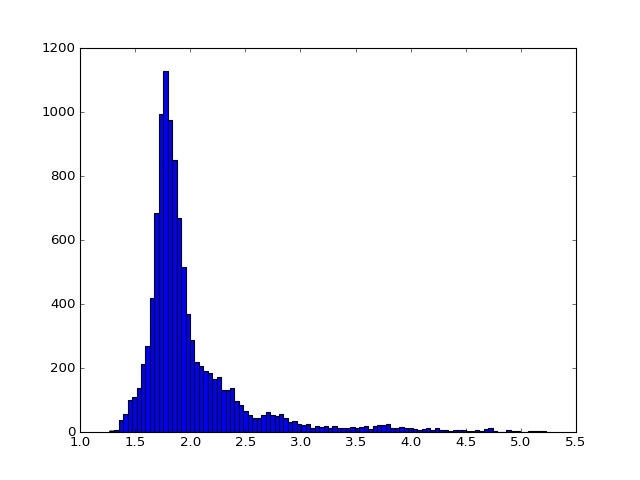

(array([  3.00000000e+00,   6.00000000e+00,   3.60000000e+01,
          5.50000000e+01,   9.90000000e+01,   1.10000000e+02,
          1.37000000e+02,   2.12000000e+02,   2.69000000e+02,
          4.20000000e+02,   6.83000000e+02,   9.93000000e+02,
          1.12800000e+03,   9.76000000e+02,   8.51000000e+02,
          6.68000000e+02,   5.15000000e+02,   3.70000000e+02,
          2.87000000e+02,   2.19000000e+02,   2.07000000e+02,
          1.90000000e+02,   1.84000000e+02,   1.65000000e+02,
          1.72000000e+02,   1.30000000e+02,   1.30000000e+02,
          1.37000000e+02,   9.70000000e+01,   8.40000000e+01,
          6.60000000e+01,   5.30000000e+01,   4.30000000e+01,
          4.30000000e+01,   5.40000000e+01,   6.30000000e+01,
          5.30000000e+01,   5.10000000e+01,   5.50000000e+01,
          4.30000000e+01,   3.10000000e+01,   3.40000000e+01,
          2.50000000e+01,   2.10000000e+01,   2.60000000e+01,
          1.40000000e+01,   2.00000000e+01,   1.50000000e+01,
        

In [174]:
fobj = open('pings_elvira.txt','r')
string = fobj.read()
fobj.close()
lista = re.findall('time=(.*)ms',string)  

delays = []
for item in lista:
    delays += [float(item)]

delays = np.array(delays)

fig = plt.figure()
ax = fig.add_subplot(111)

bins = [0,2,10,120]
bins = np.linspace(np.mean(delays)-2.0,np.mean(delays)+2.0,100)
ax.hist(delays, bins=bins)  # arguments are passed to np.histogram


In [172]:
np.mean(delays)

3.2702918462643678

In [24]:
fobj = open('pings_edimax_pc2.txt','r')
string = fobj.read()
fobj.close()
lista = re.findall('time=(.*)ms',string)  

times = []
for item in lista:
    times += [float(item)]

times = np.array(times)

plt.hist(times)  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

In [25]:
fobj = open('pings_google.txt','r')
string = fobj.read()
fobj.close()
lista = re.findall('time=(.*)ms',string)  

times = []
for item in lista:
    times += [float(item)]

times = np.array(times)

plt.hist(times)  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

In [181]:
np.max(delays)

121.0

<IPython.core.display.Javascript object>


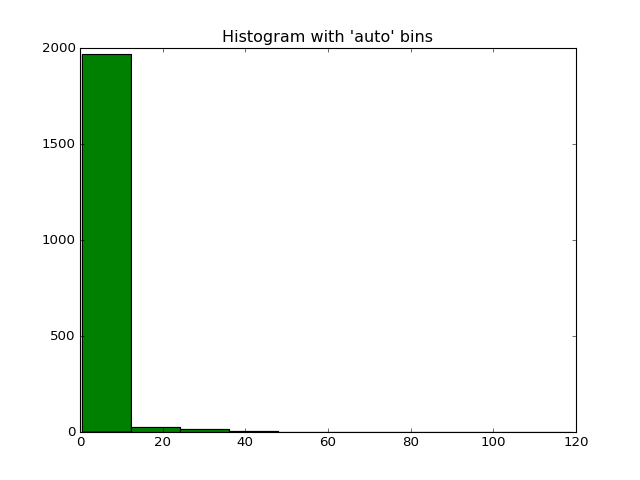

In [189]:
bins = [(0,2.0),(2.0,10.0),(10.0,10000.0)]
bins = [(  0,  2.0),
        (2.0, 10.0),
        (10.0, 20.0),
        (20.0, 30.0),   
        (30.0, 40.0),    
        (40.0, 50.0),    
        (50.0, 122.0),    
       ]


## From samples to Markov

In [190]:
N_samples = len(delays)
N_bins = len(bins)
P = np.zeros((N_bins,N_bins))
for it in range(N_samples-1):
    row = 0
    for item in bins:
        if item[0]<=delays[it]<item[1]:
            
            break
        row += 1
    col = 0
    for item in bins:
        if item[0]<=delays[it+1]<item[1]:
            
            break
        col += 1    
    P[row,col] += 1
    
for it in range(N_bins):
    P[it,:] = P[it,:]/np.sum(P[it,:])
    
#P[0,0]=0.5
#P[0,1]=0.25
#P[0,2]=0.25

#P = np.array([[ 0.5,0.25,0.25],
#              [0.25, 0.5,0.25],
#              [0.25, 0.25,0.5]])

In [191]:
P

array([[ 0.72669323,  0.25484728,  0.00265604,  0.00411687,  0.00318725,
         0.00278884,  0.00571049],
       [ 0.5982906 ,  0.37759463,  0.00579976,  0.003663  ,  0.00152625,
         0.0030525 ,  0.01007326],
       [ 0.20967742,  0.5       ,  0.24193548,  0.03225806,  0.01612903,
         0.        ,  0.        ],
       [ 0.33333333,  0.33333333,  0.11111111,  0.20634921,  0.        ,
         0.        ,  0.01587302],
       [ 0.43243243,  0.37837838,  0.        ,  0.08108108,  0.05405405,
         0.05405405,  0.        ],
       [ 0.34883721,  0.34883721,  0.        ,  0.02325581,  0.09302326,
         0.09302326,  0.09302326],
       [ 0.26612903,  0.31451613,  0.00806452,  0.00806452,  0.00806452,
         0.0483871 ,  0.34677419]])

In [192]:
N_sates = 8
N_steps = 2000
states_output = np.zeros((N_steps,))
values_output = np.zeros((N_steps,))

s_0 = 0
n_rand = random.random()
cumulative_prob = 0.0

i_current_state = s_0
for it in range(N_steps):

    # Get a random number
    n_rand = random.random()

    # Reset the cumulative probability count
    cumulative_prob = 0.0

    # Cycle through the probabilities for this state
    for i_state in range(N_sates):

        # Add this probability
        cumulative_prob = cumulative_prob + P[i_current_state, i_state]

        # See if this is a state transition
        if n_rand <= cumulative_prob:

            #Transition to another or same state
            i_current_state = i_state
            break

    # Work out the k value for this step
    if i_current_state == (N_sates):
        dk = 0        
    else:
        dk = i_current_state 

    # Store the k value
    states_output[it] = dk
    values_output[it] = dk*bins[dk][1]/N_sates



In [193]:
np.max(output)

7.0

<IPython.core.display.Javascript object>


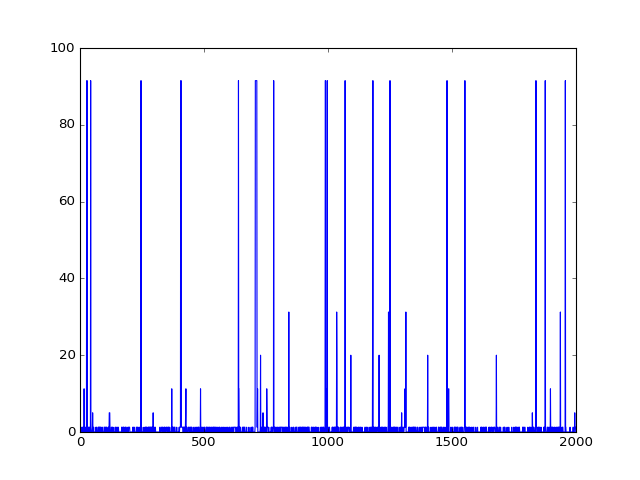

In [194]:

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(values_output)
#plt.ylim(-0.1, 10)
                

<IPython.core.display.Javascript object>


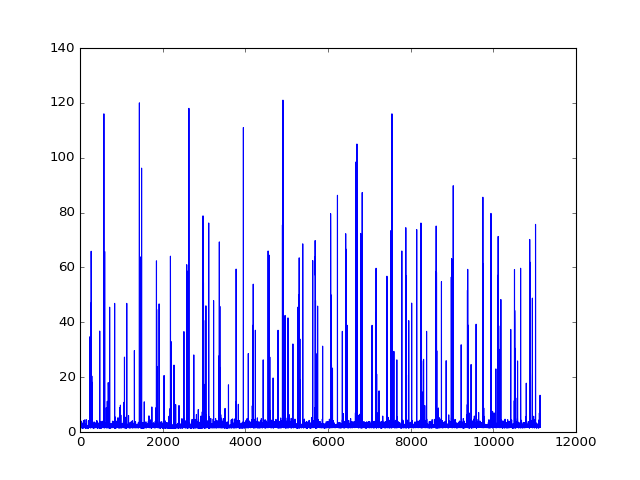

In [195]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(times)
#plt.ylim(-0.1, 10)